# Módulo 2: La Decisión (Árboles de Decisión)

## Objetivo Didáctico
Entender cómo las máquinas toman decisiones usando lógica "Si/Entonces" (If/Else), similar al juego de "Adivina Quién" o "20 Preguntas". Visualizaremos las reglas exactas que crea el modelo.

## 1. La Analogía: 20 Preguntas
Imagina que eres un médico. Llega un paciente y quieres saber si tiene gripe.
1.  ¿Tiene fiebre? (SÍ -> Ve a la pregunta 2 / NO -> No es gripe)
2.  ¿Le duele el cuerpo? (SÍ -> Es gripe / NO -> Es resfriado)

Un Árbol de Decisión hace exactamente esto. Busca la pregunta que mejor "separe" a los estudiantes que desertan de los que no.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split

# Cargar datos (mismo proceso que Módulo 1)
df = pd.read_csv('../../data/processed/clean_student_data.csv')
df_binary = df[df['Target'].isin(['Dropout', 'Graduate'])].copy()
df_binary['Target_Binary'] = df_binary['Target'].apply(lambda x: 1 if x == 'Dropout' else 0)

# Usaremos las mismas variables para comparar
features = [
    'Curricular units 1st sem (grade)', 
    'Age at enrollment', 
    'Tuition fees up to date', 
    'Scholarship holder', 
    'Debtor'
]

X = df_binary[features]
y = df_binary['Target_Binary']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## 2. Entrenando el Árbol
Vamos a limitar la profundidad del árbol (`max_depth=3`) para que sea legible. Si lo dejamos crecer infinito, se vuelve un "monstruo" incomprensible (Overfitting).

In [3]:
model_tree = DecisionTreeClassifier(max_depth=3, random_state=42)
model_tree.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,3
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


## 3. Visualizando el Cerebro del Modelo
Aquí está la magia. Podemos dibujar el diagrama de flujo exacto.

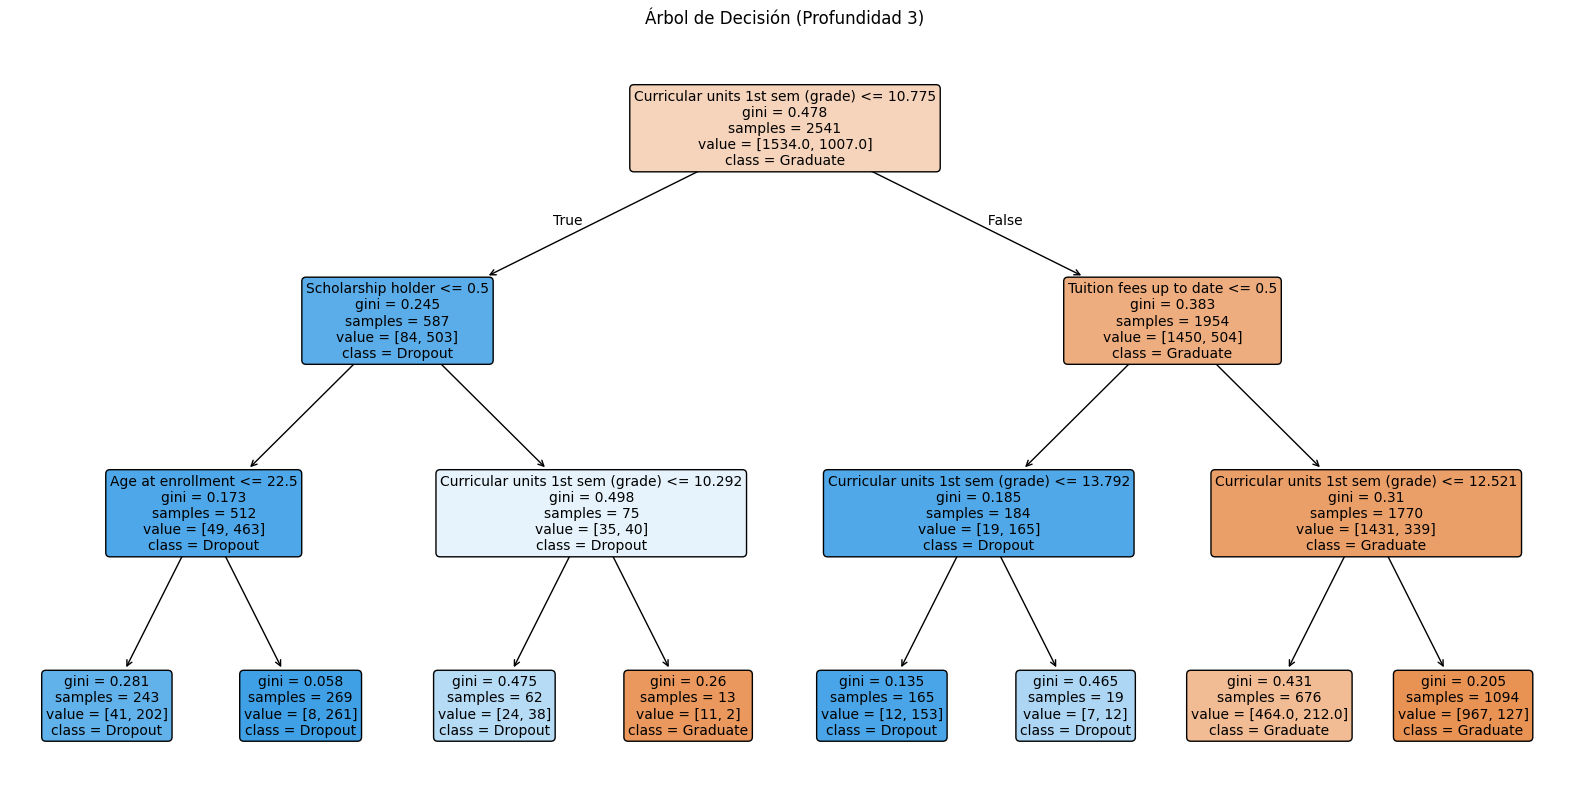

In [4]:
plt.figure(figsize=(20, 10))
plot_tree(model_tree, 
          feature_names=features, 
          class_names=['Graduate', 'Dropout'], 
          filled=True, 
          rounded=True, 
          fontsize=10)
plt.title("Árbol de Decisión (Profundidad 3)")
plt.show()

### ¿Cómo leer esto?
Mira el **nodo superior (Raíz)**. Es la pregunta más importante.
1.  Probablemente sea: `Tuition fees up to date <= 0.5` (¿No pagó la matrícula?).
    *   Si es **True** (Izquierda): La caja es naranja (Alta probabilidad de Dropout).
    *   Si es **False** (Derecha): La caja es azul (Alta probabilidad de Graduate).

2.  Sigue las flechas. Cada nivel refina la decisión.

**Gini**: Es una medida de "impureza".
*   Gini = 0.0: Pura perfección (todos son Dropout o todos Graduate).
*   Gini = 0.5: Caos total (50% Dropout, 50% Graduate).
El árbol intenta reducir el Gini en cada corte.

## 4. Reflexión: Lineal vs No Lineal
A diferencia de la Regresión Logística, el Árbol no usa una fórmula suave. Usa cortes bruscos.
Esto le permite capturar cosas como: "Si eres joven Y no pagas, es malo. Pero si eres viejo Y no pagas, quizás es peor".

**Desventaja**: Son muy inestables. Si cambias un poquito los datos, el árbol cambia totalmente. Por eso necesitamos... ¡un Bosque! (Siguiente Módulo).